In [1]:
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Dataset

import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [2]:
def logistic(t):
    return 1.0 / (1 + np.exp((-1.0)*t))

Text(0.5,1,'Logistic function')

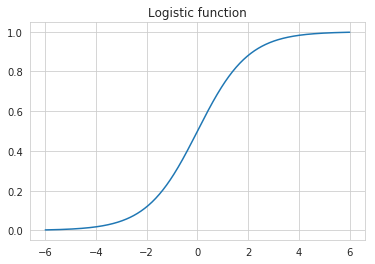

In [3]:
t = np.linspace(-6,6,500)
y = np.array([logistic(elem) for elem in t])

plt.plot(t,y)
plt.title("Logistic function")

In [4]:
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [7]:
df["Had_Affair"] = df["affairs"].apply(affair_check)

In [8]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [9]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [10]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
occ_dummies = pd.get_dummies(df['occupation'])

In [12]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [13]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [14]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [15]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [16]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [17]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [18]:
X = pd.concat([X,dummies],axis=1)

In [19]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [20]:
Y = df.Had_Affair

Y.tail()


6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [21]:
X = X.drop('affairs',axis=1)


In [22]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0


In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [24]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

0.7260446120012567

In [26]:
Y.mean()

0.3224945020420987

In [27]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [28]:
coeff_df

,0,1
0,rate_marriage,[-0.6987269441159423]
1,age,[-0.05659329719261425]
2,yrs_married,[0.10415357425299647]
3,children,[0.01828223159863582]
4,religious,[-0.36896147770893334]
5,educ,[0.008057569318003797]
6,occ1,[-0.16262316670994778]
7,occ2,[0.2222012255670494]
8,occ3,[0.5310429293041786]
9,occ4,[0.2705713513028164]


In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [30]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
class_predict = log_model2.predict(X_test)

In [32]:
print(metrics.accuracy_score(Y_test,class_predict))

0.7192211055276382
